In [4]:
import numpy as np
import functions as func
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
from astropy.wcs import WCS
import pdb, glob, mpld3

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

## Magnitude Test

In [4]:
phot_table = ascii.read('ap_phot_pipeline_results/N2420_dt_20180802.csv')
src_star   = ascii.read('../g_starsNGC2420.csv')

In [6]:
mask = np.where(phot_table['Star1_Res'] != 0.0)
phot_table['Star1_Res'][mask]

8.08444236793
7.70595496755
8.02520158933
8.27214074403
7.84463733879
8.02046128572
10.6336166118
8.37482519475
8.05024880888
7.94895014996
8.02019391382


In [35]:
flux = []
for sname in phot_table.colnames[3::2]:
    mask = np.where(phot_table[sname] != 0.0)
    flux.append(np.nanmean(phot_table[sname][mask]))

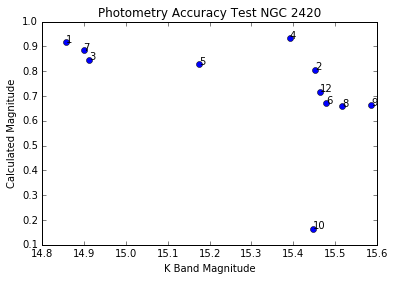

In [63]:
calc_mag = np.log10(flux)
k_mag    = src_star['K mag']

fig, ax = plt.subplots()
ax.plot(k_mag, calc_mag, 'o')
ax.set_xlabel('K Band Magnitude')
ax.set_ylabel('Calculated Magnitude')
ax.set_title('Photometry Accuracy Test NGC 2420')

labels = ['%i' % (i+1) for i in range(len(k_mag))]
for i, labels in enumerate(labels):
    ax.annotate(labels, (k_mag[i], calc_mag[i]))
plt.savefig('mag-mag plot.png')

## Center Test

In [ ]:
fnames_2506  = np.sort(glob.glob("../ngc2506/unzipped_AORs/ch1/bcd/*_bcd.fits"))
src_crd_2506 = np.load('sky_coord_ngc2506.npy')

for fname in fnames_2506[1::2]:
    hdu    = fits.open(bcd)
    header = hdu[0].header
    image  = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    src_pixcrd = w.wcs_world2pix(src_crd_2506,1)
    
    count = 0
    useful_pix = []
    for pix in src_pixcrd:
        if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
            useful_pix.append(pix)
            count += 1
    
    if count>0:
        fig, ax = plt.subplots(count, 1)
    
    for pix in useful_pix:
        cenX, cenY = func.gen_center_g2d(pix[0], pix[1], 3, 5, 4, 4, 0, image, model_plotting = True)
        
    

## BCD vs. CBCD

In [6]:
bcd  = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r*/ch1/bcd/*_bcd.fits'))
cbcd = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r*/ch1/bcd/*_cbcd.fits'))
len(bcd), len(cbcd)

(19742, 7524)

## Outlier rejection test

In [1]:
import sep_aor_flux_gen as sep

In [2]:
pixLen  = 1.221 #arcsec
pixArea = pixLen**2 #arcsec^2
pixArea = pixArea/(206265**2)

In [7]:
AORnames = np.sort(glob.glob('/data1/phot_cal/spitzer/hd165459/cryo/r*/'))
AORs = []

for aor in AORnames:
    fnames = np.sort(glob.glob(aor + 'ch1/bcd/*_bcd.fits'))
    AORs.append(fnames)

In [8]:
a, b = sep.run(AORs, '18 02 30.7410086899 +58 37 38.157415821', 10, 12, 20, 1.0, pixArea, 'n/a')

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  2.51it/s]
2it [00:00,  3.01it/s]
3it [00:00,  3.34it/s]
4it [00:01,  3.56it/s]
5it [00:01,  3.75it/s]
6it [00:01,  3.73it/s]
7it [00:01,  3.82it/s]
8it [00:01,  4.05it/s]
9it [00:02,  4.07it/s]
10it [00:02,  4.25it/s]
1it [00:02,  2.37s/it]
0it [00:00, ?it/s]
1it [00:00,  3.80it/s]
2it [00:00,  4.09it/s]
3it [00:00,  4.17it/s]
4it [00:00,  4.62it/s]
5it [00:01,  4.78it/s]
6it [00:01,  5.06it/s]
7it [00:01,  5.22it/s]
8it [00:01,  5.38it/s]
9it [00:01,  5.52it/s]
10it [00:01,  5.66it/s]
2it [00:04,  2.10s/it]
0it [00:00, ?it/s]
1it [00:00,  4.04it/s]
2it [00:00,  4.98it/s]
3it [00:00,  4.99it/s]
4it [00:00,  5.40it/s]
5it [00:00,  5.72it/s]
6it [00:01,  5.45it/s]
7it [00:01,  5.14it/s]
8it [00:01,  5.34it/s]
9it [00:01,  5.52it/s]
10it [00:01,  5.66it/s]
3it [00:06,  2.00s/it]
0it [00:00, ?it/s]
1it [00:00,  4.11it/s]
2it [00:00,  4.16it/s]
3it [00:00,  4.23it/s]
4it [00:00,  4.82it/s]
5it [00:00,  5.13it/s]
6it [00:01,  5.44it/s]
7it [

KeyboardInterrupt: 